In [1]:
# Imports
import os
import multiprocessing as mp
import pkg_resources

import numpy as np
import pandas as pd
from tabulate import tabulate

import riskmapjnr as rmj

In [2]:
# GDAL
os.environ["GDAL_CACHEMAX"] = "1024"

In [3]:
os.environ["PROJ_LIB"] = "~/mambaforge/envs/conda-rmj/share/proj"


In [4]:
out_dir = "outputs_get_started"
rmj.make_dir(out_dir)

In [5]:
fcc_file = pkg_resources.resource_filename("riskmapjnr", "data/fcc123_GLP.tif")
print(fcc_file)
border_file = pkg_resources.resource_filename("riskmapjnr", "data/ctry_border_GLP.gpkg")
print(border_file)

/Users/phuntsho/mambaforge/envs/conda-rmj/lib/python3.11/site-packages/riskmapjnr/data/fcc123_GLP.tif
/Users/phuntsho/mambaforge/envs/conda-rmj/lib/python3.11/site-packages/riskmapjnr/data/ctry_border_GLP.gpkg


In [6]:
ofile = os.path.join(out_dir, "fcc123.png")
fig_fcc123 = rmj.plot.fcc123(
    input_fcc_raster=fcc_file,
    maxpixels=1e8,
    output_file=ofile,
    borders=border_file,
    linewidth=0.2,
    figsize=(5, 4), dpi=800)
ofile

'outputs_get_started/fcc123.png'

In [ ]:
ncpu = mp.cpu_count() - 2
print(f"Number of CPUs to use: {ncpu}.")

In [8]:
results_makemap = rmj.makemap(
    fcc_file=fcc_file,
    time_interval=[10, 10],
    output_dir=out_dir,
    clean=False,
    dist_bins=np.arange(0, 1080, step=30),
    win_sizes=np.arange(5, 100, 8),
    ncat=30,
    parallel=True,
    ncpu=ncpu,
    methods=["Equal Interval", "Equal Area"],
    csize=40,
    no_quantity_error=True,
    figsize=(6.4, 4.8),
    dpi=100,
    blk_rows=128,
    verbose=True)

Model calibration and validation
.. Model 8: window size = 37, slicing method = ei.
.. Model 9: window size = 37, slicing method = ea.
.. Model 6: window size = 29, slicing method = ei.
.. Model 7: window size = 29, slicing method = ea.
.. Model 14: window size = 61, slicing method = ei.
.. Model 15: window size = 61, slicing method = ea.
.. Model 12: window size = 53, slicing method = ei.
.. Model 13: window size = 53, slicing method = ea.
.. Model 0: window size = 5, slicing method = ei.
.. Model 1: window size = 5, slicing method = ea.
.. Model 16: window size = 69, slicing method = ei.
.. Model 17: window size = 69, slicing method = ea.
.. Model 2: window size = 13, slicing method = ei.
.. Model 3: window size = 13, slicing method = ea.
.. Model 18: window size = 77, slicing method = ei.
.. Model 19: window size = 77, slicing method = ea.
.. Model 4: window size = 21, slicing method = ei.
.. Model 5: window size = 21, slicing method = ea.
.. Model 20: window size = 85, slicing meth

In [9]:
dist_thresh = results_makemap["dist_thresh"]
print(f"The distance theshold is {dist_thresh} m.")

The distance theshold is 180 m.


In [10]:
os.path.join(out_dir, "fullhist/perc_dist.png")

'outputs_get_started/fullhist/perc_dist.png'

In [11]:
os.path.join(out_dir, "modcomp/mod_comp.png")

'outputs_get_started/modcomp/mod_comp.png'

In [12]:
ws_hat = results_makemap["ws_hat"]
m_hat = results_makemap["m_hat"]
print(f"The best moving window size is {ws_hat} pixels.")
print(f"The best slicing algorithm is '{m_hat}'.")

The best moving window size is 5 pixels.
The best slicing algorithm is 'ei'.


In [13]:
os.path.join(out_dir, f"modcomp/pred_obs_ws{ws_hat}_{m_hat}.png")

'outputs_get_started/modcomp/pred_obs_ws5_ei.png'

'outputs_get_started/endval/riskmap_ws5_ei_ev.png'

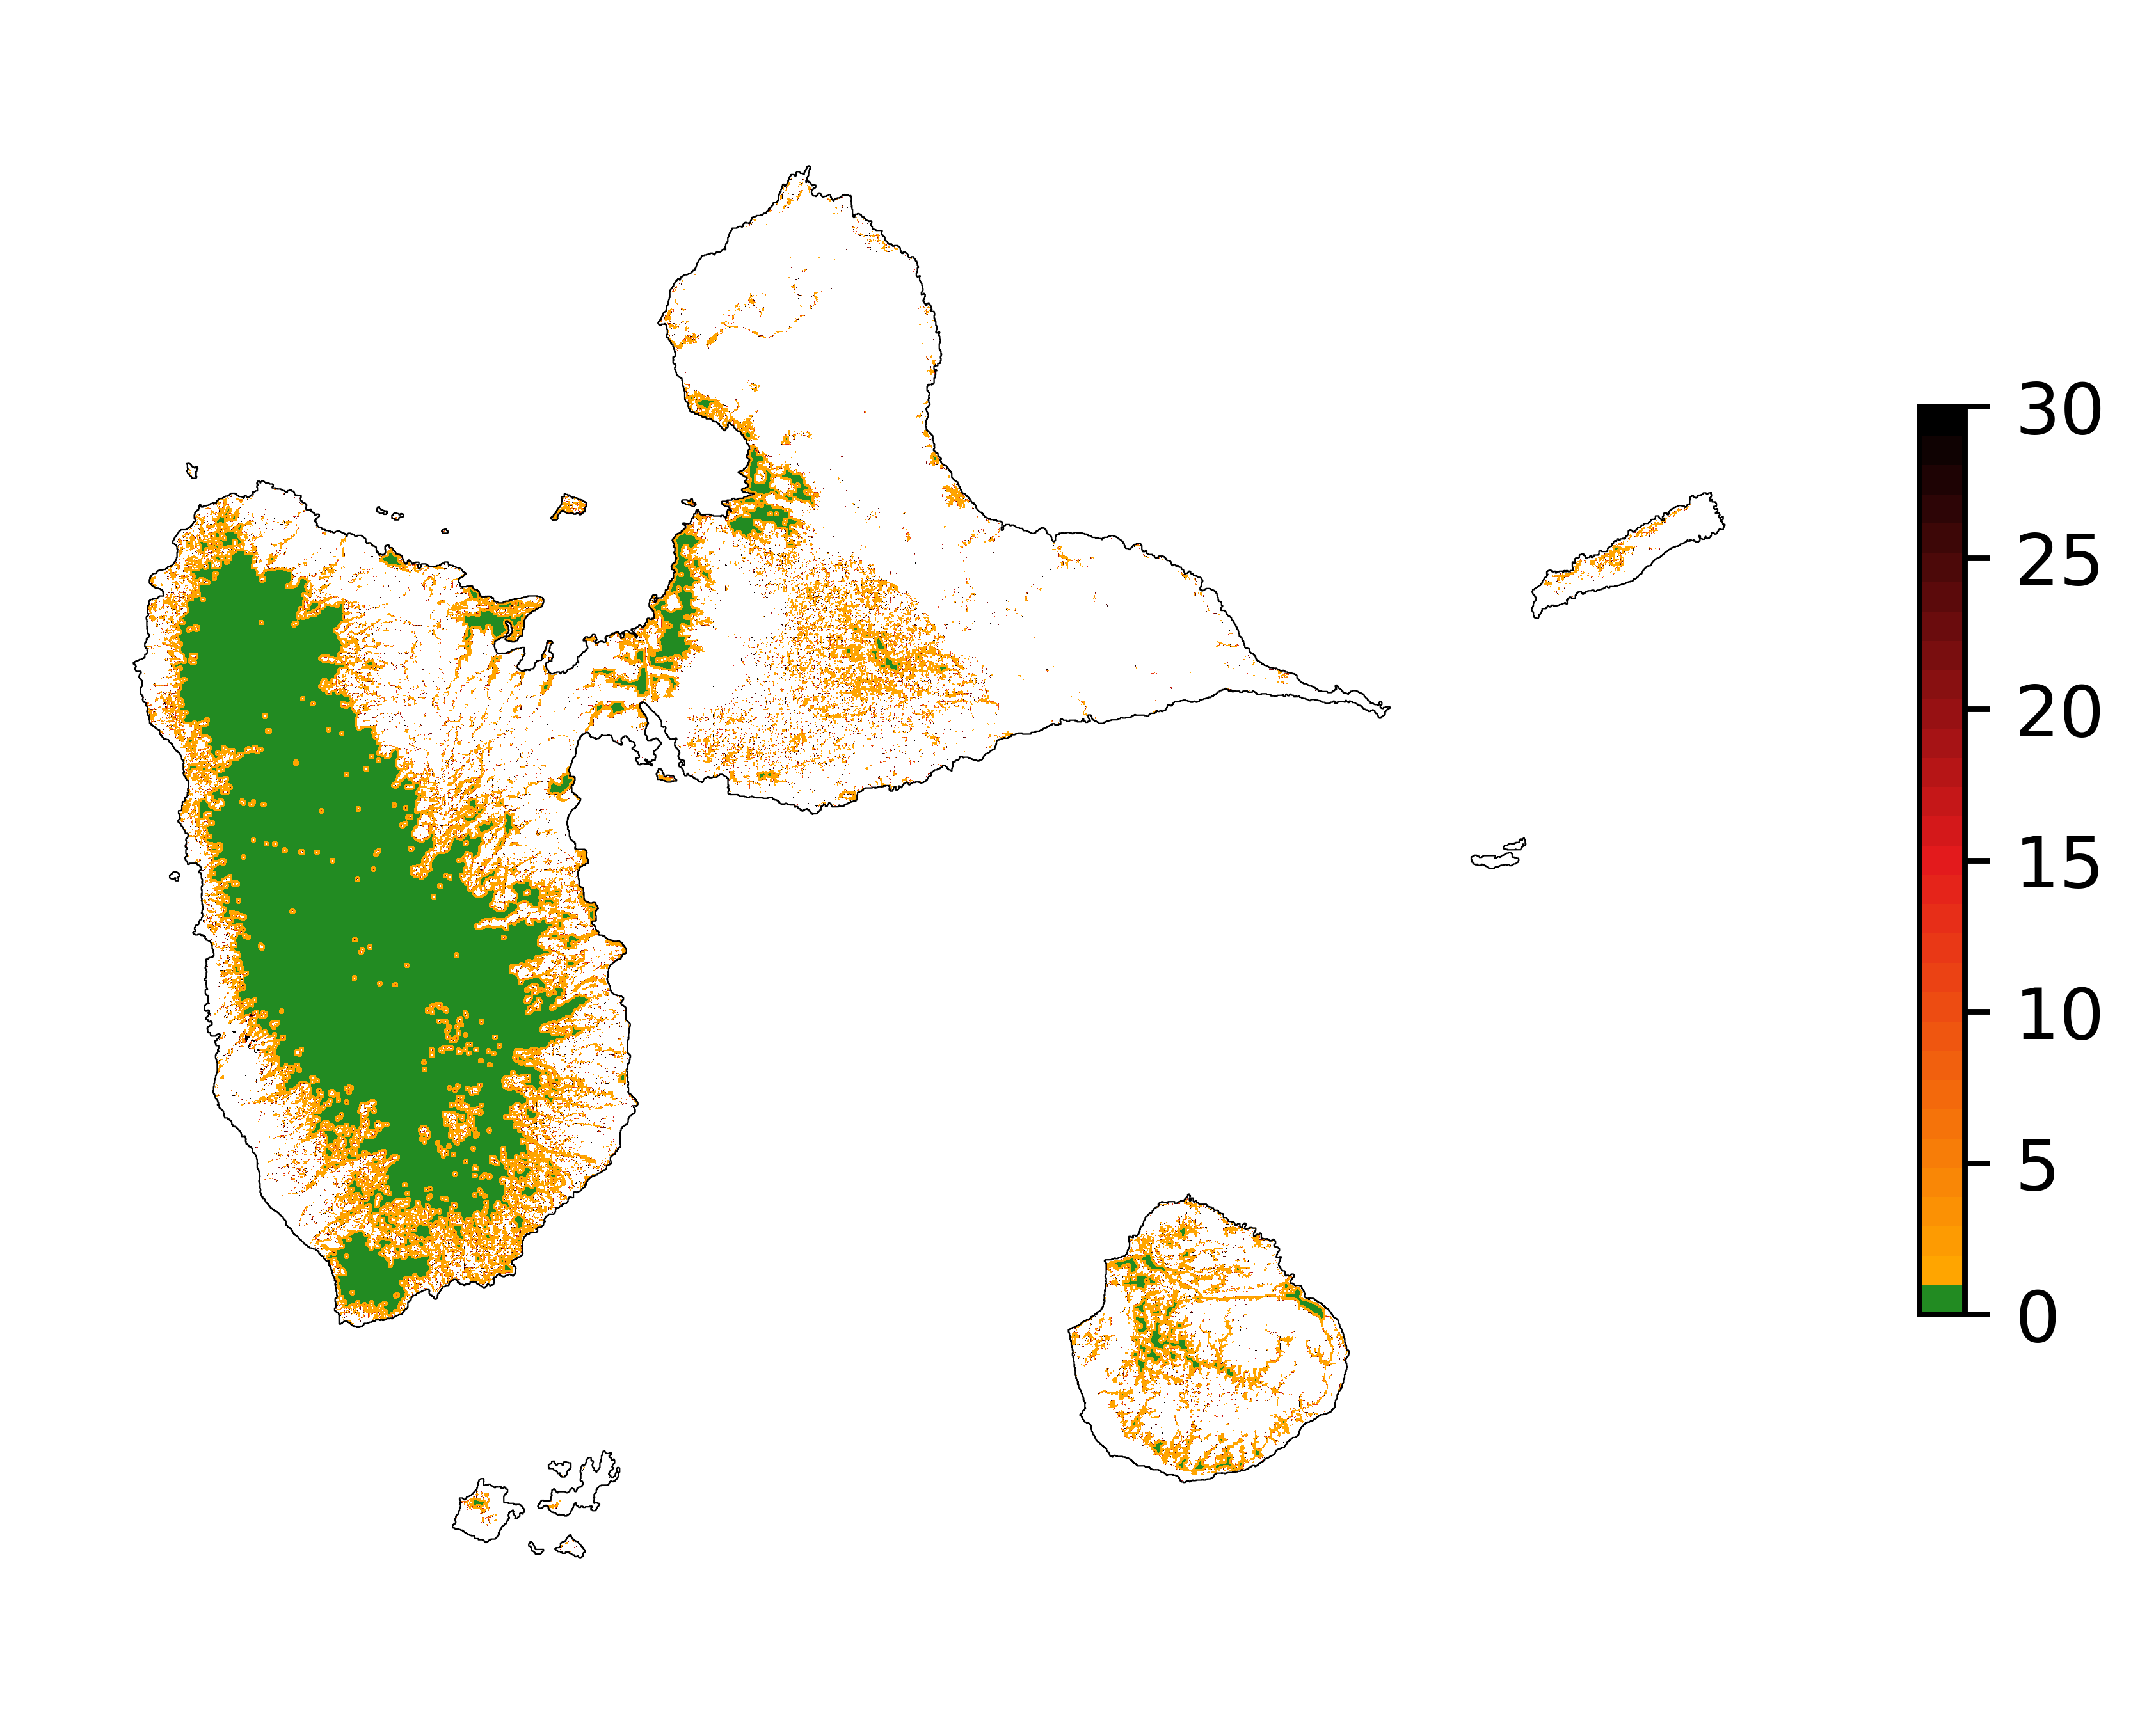

In [18]:
ifile = os.path.join(out_dir, f"endval/riskmap_ws{ws_hat}_{m_hat}_ev.tif")
ofile = os.path.join(out_dir, f"endval/riskmap_ws{ws_hat}_{m_hat}_ev.png")
riskmap_fig = rmj.plot.riskmap(
    input_risk_map=ifile,
    maxpixels=1e8,
    output_file=ofile,
    borders=border_file,
    legend=True,
    figsize=(5, 4), dpi=800, linewidth=0.2,)
ofile